# 2. Statistics packages

Julia base only very basic summary statistics, e.g. `mean`, `var`, `std`, `cov`, `cor`, `median`, `quantile`. The remainder is offered by packages.

## StatsBase.jl

StatsBase.jl provides a bunch of useful small and miscellaneous functions:

* weighted functions (`wmean`, `wsum`, `wmedian`, `wquantile`), as well as a `WeightVec` type which can be used as an argument in other functions
* `Histogram`s
* `skewness` and `kurtosis` for higher order sample moments
* `sample` for resampling from a vector, with optional weights and with/without replacement.
* Useful numerically accurate composite functions (`log1pexp`, `logsumexp`, etc.)

In [72]:
X = randn(10); w = rand(10)

10-element Array{Float64,1}:
 0.776936 
 0.0839623
 0.249478 
 0.830877 
 0.498366 
 0.327052 
 0.842677 
 0.409652 
 0.878779 
 0.3511   

In [74]:
mean(X,WeightVec(w))

0.16855206394291083

In [1]:
using StatsBase

In [2]:
X = randn(1000)
h = Histogram(X)

StatsBase.Histogram{Int64,1,Tuple{Array{Float64,1}}}
edges:
  [-0.902625,-0.538066,-0.360152,-1.61295,-0.475298,-0.291808,1.00081,1.00958,1.99507,1.83564  …  -1.14633,0.240177,0.349667,0.855454,-0.989514,1.8116,0.200786,1.02531,1.18166,0.71752]
weights: [0,0,0,0,0,0,0,0,0,0  …  0,0,0,0,0,0,0,0,0,0]
closed: right

In [66]:
sample(1:10,5,replace=false)

5-element Array{Int64,1}:
 9
 6
 8
 1
 7

## Distributions.jl

As the name would suggest, Distributions.jl provides functionality for various probability distributions.

In [3]:
using Distributions

In [75]:
d = Gamma(3,2)

Distributions.Gamma{Int64}(α=3, θ=2)

In [76]:
mean(d), var(d)

(6,12)

In [77]:
pdf(d,0:0.1:3)

31-element Array{Float64,1}:
 0.0        
 0.000594518
 0.00226209 
 0.00484148 
 0.00818731 
 0.0121688  
 0.0166684  
 0.0215811  
 0.0268128  
 0.0322799  
 0.0379082  
 0.0436318  
 0.049393   
 ⋮          
 0.0872584  
 0.0919699  
 0.0964516  
 0.100694   
 0.104688   
 0.10843    
 0.111916   
 0.115145   
 0.118116   
 0.120833   
 0.123296   
 0.125511   

In [8]:
X = rand(d,100)

100-element Array{Float64,1}:
 4.49681 
 3.18194 
 6.51386 
 3.9146  
 4.56716 
 3.94322 
 1.34544 
 7.98747 
 9.6153  
 2.30691 
 4.0251  
 6.70371 
 1.77461 
 ⋮       
 3.05699 
 2.92797 
 1.84957 
 7.42212 
 3.55835 
 5.49214 
 1.87444 
 3.3623  
 3.02157 
 3.98138 
 5.66629 
 0.593819

In [11]:
using Gadfly

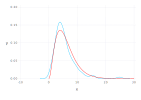

In [12]:
plot(
     layer(x -> pdf(d,x),0,30,Theme(default_color=colorant"red")),
     layer(x=X,Geom.density))

There is also some basic estimation functionality

In [13]:
df = fit_mle(Gamma,X)

Distributions.Gamma{Float64}(α=2.82992618568183, θ=1.946275623338668)

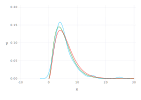

In [14]:
plot(
     layer(x -> pdf(d,x),0,30,Theme(default_color=colorant"red")),
     layer(x=X,Geom.density),
layer(x -> pdf(df,x),0,30,Theme(default_color=colorant"green"))
)

Standard multivariate distributions work in a similar manner:

In [19]:
d = MvNormal(diagm(1.0:5))

ZeroMeanFullNormal(
dim: 5
μ: [0.0,0.0,0.0,0.0,0.0]
Σ: 5x5 Array{Float64,2}:
 1.0  0.0  0.0  0.0  0.0
 0.0  2.0  0.0  0.0  0.0
 0.0  0.0  3.0  0.0  0.0
 0.0  0.0  0.0  4.0  0.0
 0.0  0.0  0.0  0.0  5.0
)


In [23]:
x = rand(d)

5-element Array{Float64,1}:
  0.392731
 -1.18531 
  1.46116 
 -1.43898 
  0.24945 

In [24]:
pdf(d,x)

0.00032305789573706977

In [21]:
rand(d,3)

5x3 Array{Float64,2}:
  0.85111  -0.888646   0.222799
  1.48542  -1.54148    0.109485
 -2.99603  -0.863524  -0.506261
  2.00319  -2.26243    4.50401 
  2.6496    1.55756   -0.350972

In [25]:
fit_mle(MvNormal,rand(d,20))

FullNormal(
dim: 5
μ: [-0.01378204559428995,-0.19394842743246327,0.5159989474667155,0.28415138234932136,-1.0708615456166195]
Σ: 5x5 Array{Float64,2}:
  0.886196   -0.168531   0.195138  -0.0532017   0.291525
 -0.168531    2.01522   -0.481884   0.845432    0.906799
  0.195138   -0.481884   4.07193   -0.296108   -0.566344
 -0.0532017   0.845432  -0.296108   4.07595     0.78707 
  0.291525    0.906799  -0.566344   0.78707     4.25974 
)


Also supports more complicated structures:

In [78]:
d = MixtureModel([Normal(0.0,1),Normal(3.0,1)],[0.7,0.3])

MixtureModel{Distributions.Normal{Float64}}(K = 2)
components[1] (prior = 0.7000): Distributions.Normal{Float64}(μ=0.0, σ=1.0)
components[2] (prior = 0.3000): Distributions.Normal{Float64}(μ=3.0, σ=1.0)


In [79]:
rand(d,100)

100-element Array{Float64,1}:
 -0.454709
  2.33688 
  0.347169
 -0.266928
  4.08961 
 -0.898774
  0.182409
  4.2626  
 -2.25483 
 -1.17395 
  3.1387  
  1.64434 
  3.68358 
  ⋮       
  1.87118 
  0.36304 
  0.462609
  2.73185 
  0.780083
 -1.4793  
  6.77503 
  1.30994 
  3.27806 
 -1.2031  
 -0.459803
  3.46144 

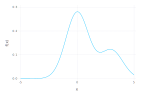

In [39]:
plot(x -> pdf(d,x),-5,5)

## DataFrames.jl

DataFrames provides the basic "data table" framework (similar to `data.frame` in R, or pandas in Python).

> **Note:** Though DataFrames is performant compared with R, it does have some notable performance limitations inherent in its design, and is likely to be redesigned or replaced in future.

In [40]:
using DataFrames

There is a `readtable` function for loading data from CSV or other delimited files. There are also various packages for importing from databases.

Can also construct directly:

In [41]:
DataFrame(col1=rand(10),col2=1:10)

,col1,col2
1,0.4241499212658557,1
2,0.5346347434597589,2
3,0.7822833312041271,3
4,0.4499426363301686,4
5,0.31018423273984963,5
6,0.7920468055798473,6
7,0.3638311317447971,7
8,0.1405163781413188,8
9,0.38998322715972633,9
10,0.2311779335153128,10


Each column is a `DataArray`, a type of `AbstractArray` that supports NA values. These can be created using the `@data` macro.

You can also store custom Julia types.

In [42]:
DataFrame(col1=@data([1,2,NA]),col2=[Normal(x,1) for x in 1:3])

,col1,col2
1,1,"Distributions.Normal{Int64}(μ=1, σ=1)"
2,2,"Distributions.Normal{Int64}(μ=2, σ=1)"
3,NA,"Distributions.Normal{Int64}(μ=3, σ=1)"


In [80]:
using RDatasets # datasets included with R
iris = dataset("datasets", "iris")

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa
6,5.4,3.9,1.7,0.4,setosa
7,4.6,3.4,1.4,0.3,setosa
8,5.0,3.4,1.5,0.2,setosa
9,4.4,2.9,1.4,0.2,setosa
10,4.9,3.1,1.5,0.1,setosa


In [45]:
iris[:SepalLength] # indexing by a symbol gives column

150-element DataArrays.DataArray{Float64,1}:
 5.1
 4.9
 4.7
 4.6
 5.0
 5.4
 4.6
 5.0
 4.4
 4.9
 5.4
 4.8
 4.8
 ⋮  
 6.0
 6.9
 6.7
 6.9
 5.8
 6.8
 6.7
 6.7
 6.3
 6.5
 6.2
 5.9

In [46]:
iris[1,:] # usual row,column indexing

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
1,5.1,3.5,1.4,0.2,setosa


In [47]:
iris[iris[:SepalLength] .< 5,:] # can subset by indexing

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,4.6,3.4,1.4,0.3,setosa
5,4.4,2.9,1.4,0.2,setosa
6,4.9,3.1,1.5,0.1,setosa
7,4.8,3.4,1.6,0.2,setosa
8,4.8,3.0,1.4,0.1,setosa
9,4.3,3.0,1.1,0.1,setosa
10,4.6,3.6,1.0,0.2,setosa


Supports the "split-apply-combine" strategy, similar to dplyr.

In [49]:
by(iris, :Species, df -> mean(df[:PetalLength]))

,Species,x1
1,setosa,1.462
2,versicolor,4.260000000000001
3,virginica,5.5520000000000005


Integrates nicely with Gadfly

In [50]:
using Gadfly

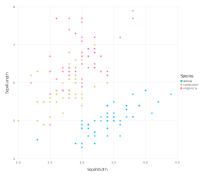

In [51]:
set_default_plot_size(20cm, 18cm)
plot(iris,x=:SepalWidth,y=:SepalLength,color=:Species)

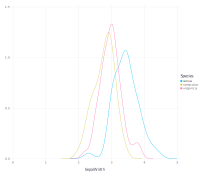

In [52]:
plot(iris,x=:SepalWidth,color=:Species,Geom.density)

## GLM.jl

Provides linear and generalized linear regression models.

In [61]:
using GLM

Uses a R-style formula syntax

In [54]:
fit(LinearModel, SepalWidth ~ SepalLength + Species, iris)

DataFrames.DataFrameRegressionModel{GLM.LinearModel{GLM.LmResp{Array{Float64,1}},GLM.DensePredQR{Float64}},Array{Float64,2}}

Formula: SepalWidth ~ 1 + SepalLength + Species

Coefficients:
                      Estimate Std.Error t value Pr(>|t|)
(Intercept)             1.6765   0.23536 7.12314   <1e-10
SepalLength            0.34988 0.0463013  7.5566   <1e-11
Species: versicolor  -0.983389 0.0720747 -13.644   <1e-27
Species: virginica    -1.00751 0.0933057 -10.798   <1e-19


In [55]:
warpbreaks = dataset("datasets","warpbreaks")

,Breaks,Wool,Tension
1,26,A,L
2,30,A,L
3,54,A,L
4,25,A,L
5,70,A,L
6,52,A,L
7,51,A,L
8,26,A,L
9,67,A,L
10,18,A,M


In [56]:
g = fit(GeneralizedLinearModel,Breaks ~ Wool + Tension,warpbreaks,Poisson())

DataFrames.DataFrameRegressionModel{GLM.GeneralizedLinearModel{GLM.GlmResp{Array{Float64,1},Distributions.Poisson{Float64},GLM.LogLink},GLM.DensePredChol{Float64,Base.LinAlg.Cholesky{Float64,Array{Float64,2}}}},Array{Float64,2}}

Formula: Breaks ~ 1 + Wool + Tension

Coefficients:
              Estimate Std.Error  z value Pr(>|z|)
(Intercept)    3.69196 0.0454107  81.3016   <1e-99
Wool: B      -0.205988 0.0515712 -3.99426    <1e-4
Tension: M    -0.32132 0.0602658 -5.33172    <1e-7
Tension: H   -0.518488 0.0639594 -8.10652   <1e-15


In [67]:
predict(g)

54-element Array{Float64,1}:
 40.1235
 40.1235
 40.1235
 40.1235
 40.1235
 40.1235
 40.1235
 40.1235
 40.1235
 29.0972
 29.0972
 29.0972
 29.0972
  ⋮     
 23.6806
 23.6806
 23.6806
 19.443 
 19.443 
 19.443 
 19.443 
 19.443 
 19.443 
 19.443 
 19.443 
 19.443 

## KernelDensity.jl

Provides kernel density estimation (kde) functionality. The two main functions:
* `kde`: provides univariate and bivariate kdes, bandwidth is selected via a simple heurestic
* `kde_lscv`: univariate kdes via least-squares cross validation.

In [81]:
using KernelDensity

In [85]:
X = rand(Gamma(2,3),100)
k = kde(X)

KernelDensity.UnivariateKDE{FloatRange{Float64}}(-5.14454525010187:0.017215281527228475:30.095136036134818,[3.01324e-6,3.08221e-6,3.1589e-6,3.24349e-6,3.33618e-6,3.43719e-6,3.54676e-6,3.66514e-6,3.7926e-6,3.92942e-6  …  2.71631e-6,2.71543e-6,2.72115e-6,2.73351e-6,2.75258e-6,2.77844e-6,2.81118e-6,2.85091e-6,2.89774e-6,2.9518e-6])

The density estimates can then be accessed via the `pdf` function, similar to Distributions:

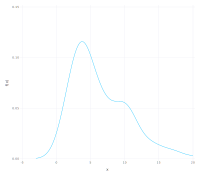

In [83]:
plot(x -> pdf(k,x), -3,20)

## Other 

* Mixed effects models: MixedModels.jl
* Penalized regression: GLMNet.jl and Lasso.jl
* Various MCMC and approximate inference packages: Klara.jl, Stan.jl, VinDsl.jl
* Deep learning: Mxnet.jl, Mocha.jl